# IML - P2

![15560369383553_2c2.jpg](input/15560369383553_2c2.jpg)

1. Select Data

2. Clean up Data

3. Transform Data


# Exploratory Data Analysis

## What's provided ?

### Target

Show representations of the dataset through univariate and multivariate analysis

main interesting feature are:
* nutriscore_score
* nutriscore_grade

### Size / Nb lines & columns

Data set contains 186 columns and approx 2Mio lignes

### Types of features / variables

it contains a mix of types : dates, strings, numbers

Interesting ones:

#### Qualitative
* countries_tags
* allergens
* traces
* additives
* pnns_groups_1 [explanation (fr)](https://solidarites-sante.gouv.fr/IMG/pdf/pnns4_2019-2023.pdf)
* pnns_groups_2
* nova_group [explanation (fr)](https://www.thierrysouccar.com/nutrition/info/nova-une-classification-des-aliments-basee-sur-la-science-3936)
* brand_owner ?
* main_category

#### Quantitative
* serving_size
* serving_quantity
* no_nutriments
* additives_n
* ingredients_from_palm_oil_n
* ingredients_that_may_be_from_palm_oil_n
* nutriscore_score
* nutriscore_grade
* ecoscore_score_fr
* ecoscore_grade_fr

Detailed variables :

* abcd_100g

### Missing values identification

What are the features which have lots of NaN / empty values ?


## What's in it ?

* Target visualisation (hist, boxplot)

* Features comprehension

* Features - target relations

* Outliers recognition

In [1]:
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
import pycountry

os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
# os.environ["MODIN_ENGINE"] = "dask"  # Modin will use Dask

# import pandas as pd
import modin.pandas as pd
import ray
ray.init(ignore_reinit_error=True)

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

> important notice : import is made with date type parsing sepcified for some columns, after preliminary analysis

# LOADING

![](assets/loading.png)


In [2]:
df = pd.read_csv('input/open-food-facts/en.openfoodfacts.org.products.csv', sep='\t', parse_dates=['created_datetime','last_modified_datetime'])

In [3]:
df_bck = df.copy()

In [4]:
df = df_bck.copy()

In [5]:
df.shape

(1988476, 186)

In [6]:
# pd.set_option('display.max_columns', None)
df.head()


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16 14:53:28+00:00,1623855209,2021-06-16 14:53:29+00:00,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01 08:11:51+00:00,1630484064,2021-09-01 08:14:24+00:00,L.casei,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15 10:38:00+00:00,1561463718,2019-06-25 11:55:18+00:00,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13 21:06:14+00:00,1539464817,2018-10-13 21:06:57+00:00,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19 15:02:16+00:00,1624390765,2021-06-22 19:39:25+00:00,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,additives,ingredients_from_palm_oil_n,ingredients_from_palm_oil,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.988476e+06,1.988476e+06,0.0,0.0,4.975140e+05,0.0,722441.000000,0.0,722441.000000,0.0,...,11867.000000,719224.000000,8.000000,4.000000,1.0,63.000000,1712.000000,38.000000,69.000000,39.000000
mean,1.560070e+09,1.595301e+09,NaN,NaN,2.233335e+16,NaN,2.029187,NaN,0.020294,NaN,...,615.324945,9.103861,13.875000,34.175000,9100.0,3.238417,0.068921,3.278158,2.201766,0.025676
std,5.296541e+07,3.116836e+07,NaN,NaN,1.575269e+19,NaN,2.899762,NaN,0.142943,NaN,...,6082.140585,8.842205,8.576338,15.620153,NaN,18.705382,1.826776,1.562956,12.669790,0.090002
min,1.328021e+09,1.333873e+09,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000,NaN,...,0.049000,-15.000000,1.000000,14.000000,9100.0,0.000000,0.000000,0.400000,0.001350,0.000800
25%,1.524120e+09,1.582759e+09,NaN,NaN,2.800000e+01,NaN,0.000000,NaN,0.000000,NaN,...,107.800000,1.000000,8.250000,26.000000,9100.0,0.056500,0.000008,2.450000,0.010000,0.007050
50%,1.571243e+09,1.599393e+09,NaN,NaN,5.300000e+01,NaN,1.000000,NaN,0.000000,NaN,...,328.500000,10.000000,15.500000,37.000000,9100.0,0.073600,0.000023,3.600000,0.025000,0.011000
75%,1.603225e+09,1.619531e+09,NaN,NaN,1.133981e+02,NaN,3.000000,NaN,0.000000,NaN,...,614.200000,16.000000,22.000000,45.175000,9100.0,0.125000,0.000096,4.000000,0.047000,0.015000
max,1.634172e+09,1.634172e+09,NaN,NaN,1.111111e+22,NaN,49.000000,NaN,3.000000,NaN,...,656298.600000,40.000000,22.000000,48.700000,9100.0,136.000000,54.000000,7.300000,75.000000,0.572000


In [8]:
df.columns.size

186

# CLEANING

![](assets/data_cleaning.jpeg)


## Features Types

In [9]:
for col in range(0, df.columns.size):
    print(f'{df.columns[col]:<45} {str(df.dtypes[col]):>}')

code                                          object
url                                           object
creator                                       object
created_t                                     int64
created_datetime                              datetime64[ns, UTC]
last_modified_t                               int64
last_modified_datetime                        datetime64[ns, UTC]
product_name                                  object
abbreviated_product_name                      object
generic_name                                  object
quantity                                      object
packaging                                     object
packaging_tags                                object
packaging_text                                object
brands                                        object
brands_tags                                   object
categories                                    object
categories_tags                               object
categories_en         

<AxesSubplot:ylabel='None'>

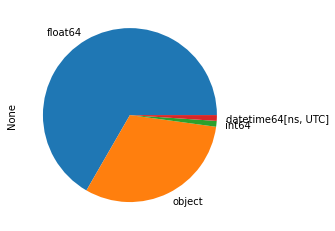

In [10]:
df.dtypes.value_counts().plot.pie()

## Investigate `int` and `date` values

In [11]:
df.columns[((df.dtypes != 'float') & (df.dtypes != 'object'))]

Index(['created_t', 'created_datetime', 'last_modified_t',
       'last_modified_datetime'],
      dtype='object')

In [12]:
df.dtypes[['created_t','created_datetime','last_modified_t', 'last_modified_datetime']]

created_t                               int64
created_datetime          datetime64[ns, UTC]
last_modified_t                         int64
last_modified_datetime    datetime64[ns, UTC]
dtype: object

In [13]:
df[['created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime']]

,created_t,created_datetime,last_modified_t,last_modified_datetime
0,1623855208,2021-06-16 14:53:28+00:00,1623855209,2021-06-16 14:53:29+00:00
1,1630483911,2021-09-01 08:11:51+00:00,1630484064,2021-09-01 08:14:24+00:00
2,1529059080,2018-06-15 10:38:00+00:00,1561463718,2019-06-25 11:55:18+00:00
3,1539464774,2018-10-13 21:06:14+00:00,1539464817,2018-10-13 21:06:57+00:00
4,1574175736,2019-11-19 15:02:16+00:00,1624390765,2021-06-22 19:39:25+00:00
...,...,...,...,...
1988471,1572513866,2019-10-31 09:24:26+00:00,1572513866,2019-10-31 09:24:26+00:00
1988472,1608105503,2020-12-16 07:58:23+00:00,1608105504,2020-12-16 07:58:24+00:00
1988473,1581171613,2020-02-08 14:20:13+00:00,1582644247,2020-02-25 15:24:07+00:00
1988474,1613129728,2021-02-12 11:35:28+00:00,1613129730,2021-02-12 11:35:30+00:00


In [14]:
pd.to_datetime(df['created_t'], unit='s').head()

0   2021-06-16 14:53:28
1   2021-09-01 08:11:51
2   2018-06-15 10:38:00
3   2018-10-13 21:06:14
4   2019-11-19 15:02:16
Name: created_t, dtype: datetime64[ns]

we can see `created_t` and `created_datetime` represents the same but in different format. We choose to keep only one

In [15]:
df.drop({
    'created_t', 
    'last_modified_t', 
        }, axis=1, inplace=True)

## Cleaning unecessary data


### Remove empty columns 

let's compute the ratio: $ \frac{\text{empty values}}{\text{nb rows}} $

In [16]:
pd.set_option('display.max_rows', None)

(apply_list_of_funcs pid=122206) 


<AxesSubplot:ylabel='Frequency'>

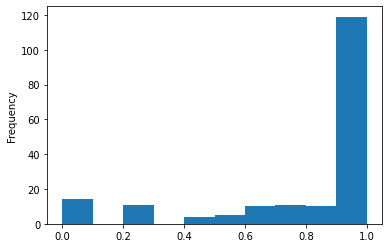

In [17]:
df.sample(round(df.shape[0]*0.02)).isna().mean().sort_values().plot(kind="hist")

About 120 out of 186 columns have more than 80% of empty cells. The dataset despite being large, is almost empty !

<AxesSubplot:>

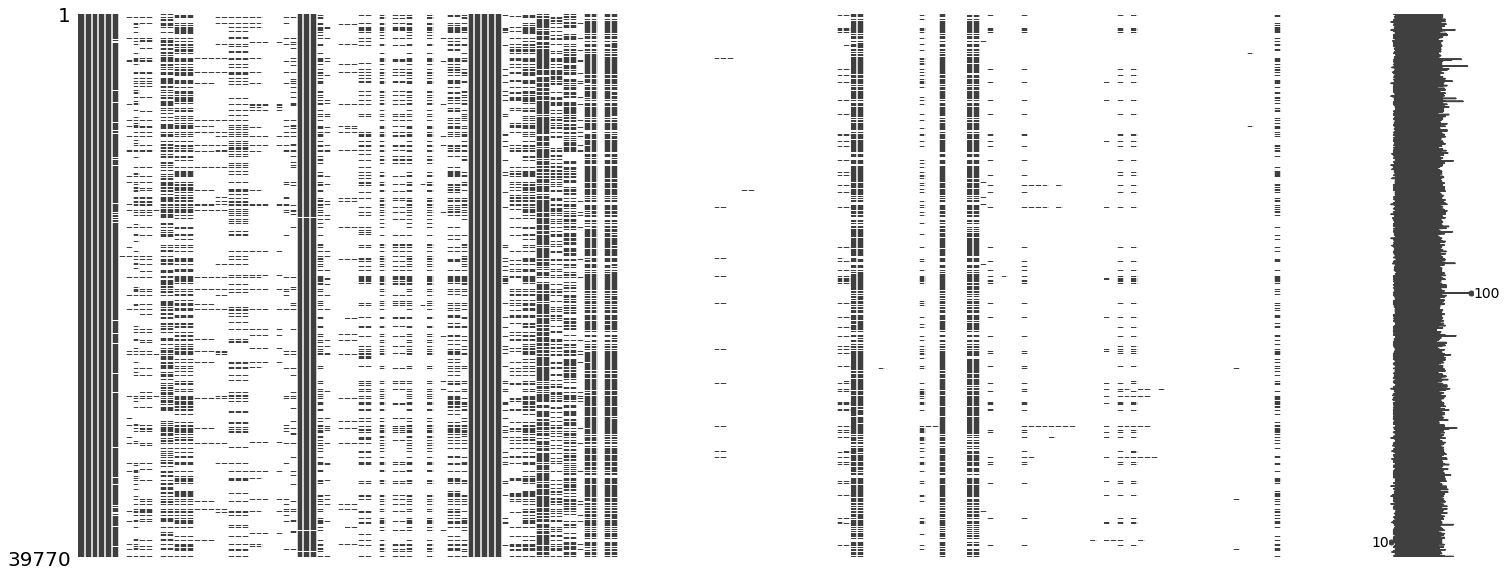

In [18]:
msno.matrix(df.sample(round(df.shape[0]*0.02)))

Taking a sample (20%) of the dataset, to ease compute, we can see there are some plateau of columns missing data, let's consider we want to remove at least those that have more than 70% of missing value.

In [19]:
threshold = 0.7
df = df[df.columns[df.isna().mean() < threshold]]

### Remove not interesting columns

List remaining columns, remove the obviouses manually

#### Remove 'url' features


In [20]:
url_columns = df.filter(regex='url').columns.values
print(url_columns)
df = df.drop(url_columns, axis=1)

['url' 'image_url' 'image_small_url' 'image_ingredients_url'
 'image_ingredients_small_url' 'image_nutrition_url'
 'image_nutrition_small_url']


<AxesSubplot:ylabel='None'>

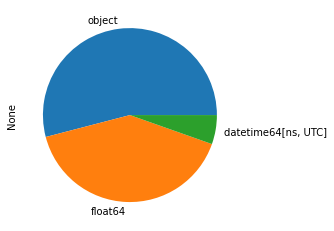

In [21]:
df.dtypes.value_counts().plot.pie()

(apply_list_of_funcs pid=122232) 


<AxesSubplot:title={'center':'percentage of missing values per feature'}>

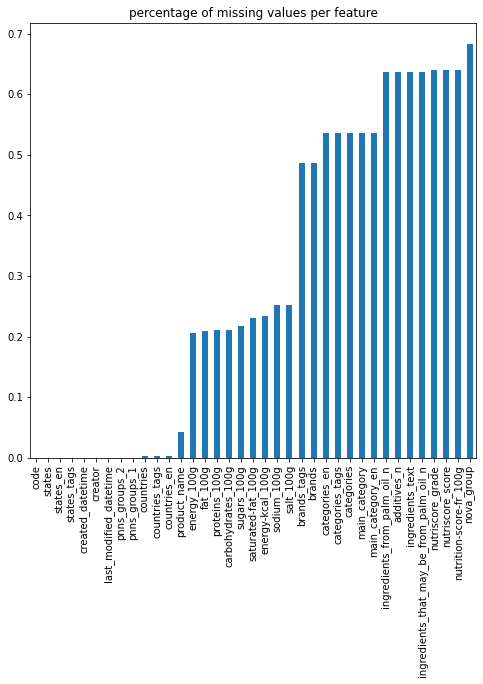

In [22]:
df.sample(round(df.shape[0]*0.02)).isna().mean().sort_values().plot(kind="bar", title='percentage of missing values per feature', figsize=(8,8))

<AxesSubplot:>

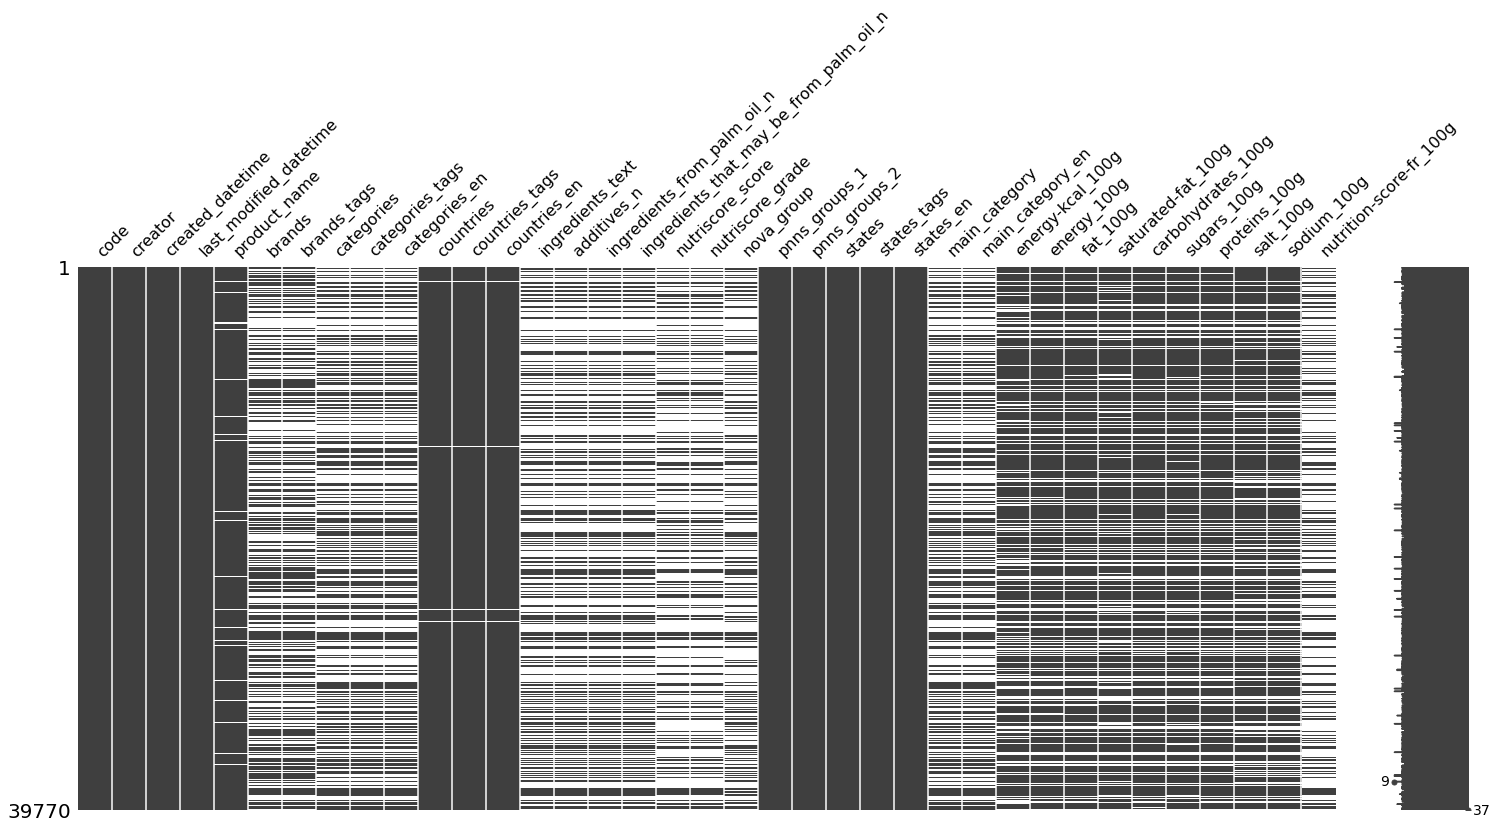

In [23]:
msno.matrix(df.sample(round(df.shape[0]*0.02)))

In [24]:
df.columns.size

37

In [25]:
pd.DataFrame({'column_name': df.columns, 'percent_missing': df.isna().mean() * 100})

,column_name,percent_missing
code,code,0.000000
creator,creator,0.000201
created_datetime,created_datetime,0.000000
last_modified_datetime,last_modified_datetime,0.000000
product_name,product_name,4.101583
brands,brands,48.329273
brands_tags,brands_tags,48.332643
categories,categories,53.290208
categories_tags,categories_tags,53.290460
categories_en,categories_en,53.290460


## Conclusion

Now we have a dataset with 37 remaining columns, which have at least 70% of data filled in each. 

Only 3 kind of types exists.

We can start analysing the values, in a consistent way


# ANALYSIS

![](assets/SEO-analysis.jpg)

## Outliers analysis

In [26]:
for col in df.select_dtypes('float').columns:
    print(col)

additives_n
ingredients_from_palm_oil_n
ingredients_that_may_be_from_palm_oil_n
nutriscore_score
nova_group
energy-kcal_100g
energy_100g
fat_100g
saturated-fat_100g
carbohydrates_100g
sugars_100g
proteins_100g
salt_100g
sodium_100g
nutrition-score-fr_100g


In [332]:
pd.options.display.float_format = '{:.2f}'.format
df.select_dtypes('float').agg(["min", "max", "median", "mean", "var", "std", "skew", "kurtosis"]).T

,min,max,median,mean,var,std,skew,kurtosis
additives_n,0.00,49.00,1.00,2.03,8.41,2.90,2.38,8.47
ingredients_from_palm_oil_n,0.00,3.00,0.00,0.02,0.02,0.14,7.09,50.82
ingredients_that_may_be_from_palm_oil_n,0.00,6.00,0.00,0.07,0.09,0.30,5.36,36.94
nutriscore_score,-15.00,40.00,10.00,9.10,78.18,8.84,0.10,-0.94
nova_group,1.00,4.00,4.00,3.42,0.95,0.97,-1.65,1.43
energy-kcal_100g,0.00,41.60,17.00,16.35,208.75,14.45,0.20,-1.47
energy_100g,0.00,41.50,0.00,5.44,85.24,9.23,1.97,3.10
fat_100g,0.00,41.66,5.70,10.32,127.81,11.31,0.95,-0.29
saturated-fat_100g,0.00,41.60,1.80,4.77,42.86,6.55,1.75,2.77
carbohydrates_100g,-1.00,41.66,6.33,10.24,118.58,10.89,1.15,0.36


2021-11-08 00:13:23,105	ERROR worker.py:79 -- Unhandled error (suppress with RAY_IGNORE_UNHANDLED_ERRORS=1): ray::deploy_ray_func() (pid=122222, ip=192.168.0.23)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/pandas/core/reshape/concat.py", line 294, in concat
    op = _Concatenator(
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/pandas/core/reshape/concat.py", line 384, in __init__
    raise TypeError(msg)
TypeError: cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid

The above exception was the direct cause of the following exception:

ray::deploy_ray_func() (pid=122222, ip=192.168.0.23)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/ray/pandas_on_ray/frame/axis_partition.py", l

In [340]:
for col in df.select_dtypes('float'):
    m = df[col].mode()
    if m.size == 1:
        print(f"{col:<60} : {m}")
    else:
        print(f"{col:<60} : multimode")

additives_n                                                  : 0   0.00
Name: additives_n, dtype: float64
ingredients_from_palm_oil_n                                  : 0   0.00
Name: ingredients_from_palm_oil_n, dtype: float64
ingredients_that_may_be_from_palm_oil_n                      : 0   0.00
Name: ingredients_that_may_be_from_palm_oil_n, dtype: float64
nutriscore_score                                             : 0   14.00
Name: nutriscore_score, dtype: float64
nova_group                                                   : 0   4.00
Name: nova_group, dtype: float64
energy-kcal_100g                                             : 0   0.00
Name: energy-kcal_100g, dtype: float64
energy_100g                                                  : 0   0.00
Name: energy_100g, dtype: float64
fat_100g                                                     : 0   0.00
Name: fat_100g, dtype: float64
saturated-fat_100g                                           : 0   0.00
Name: saturated-fat_100g, dty

<function matplotlib.pyplot.show(close=None, block=None)>

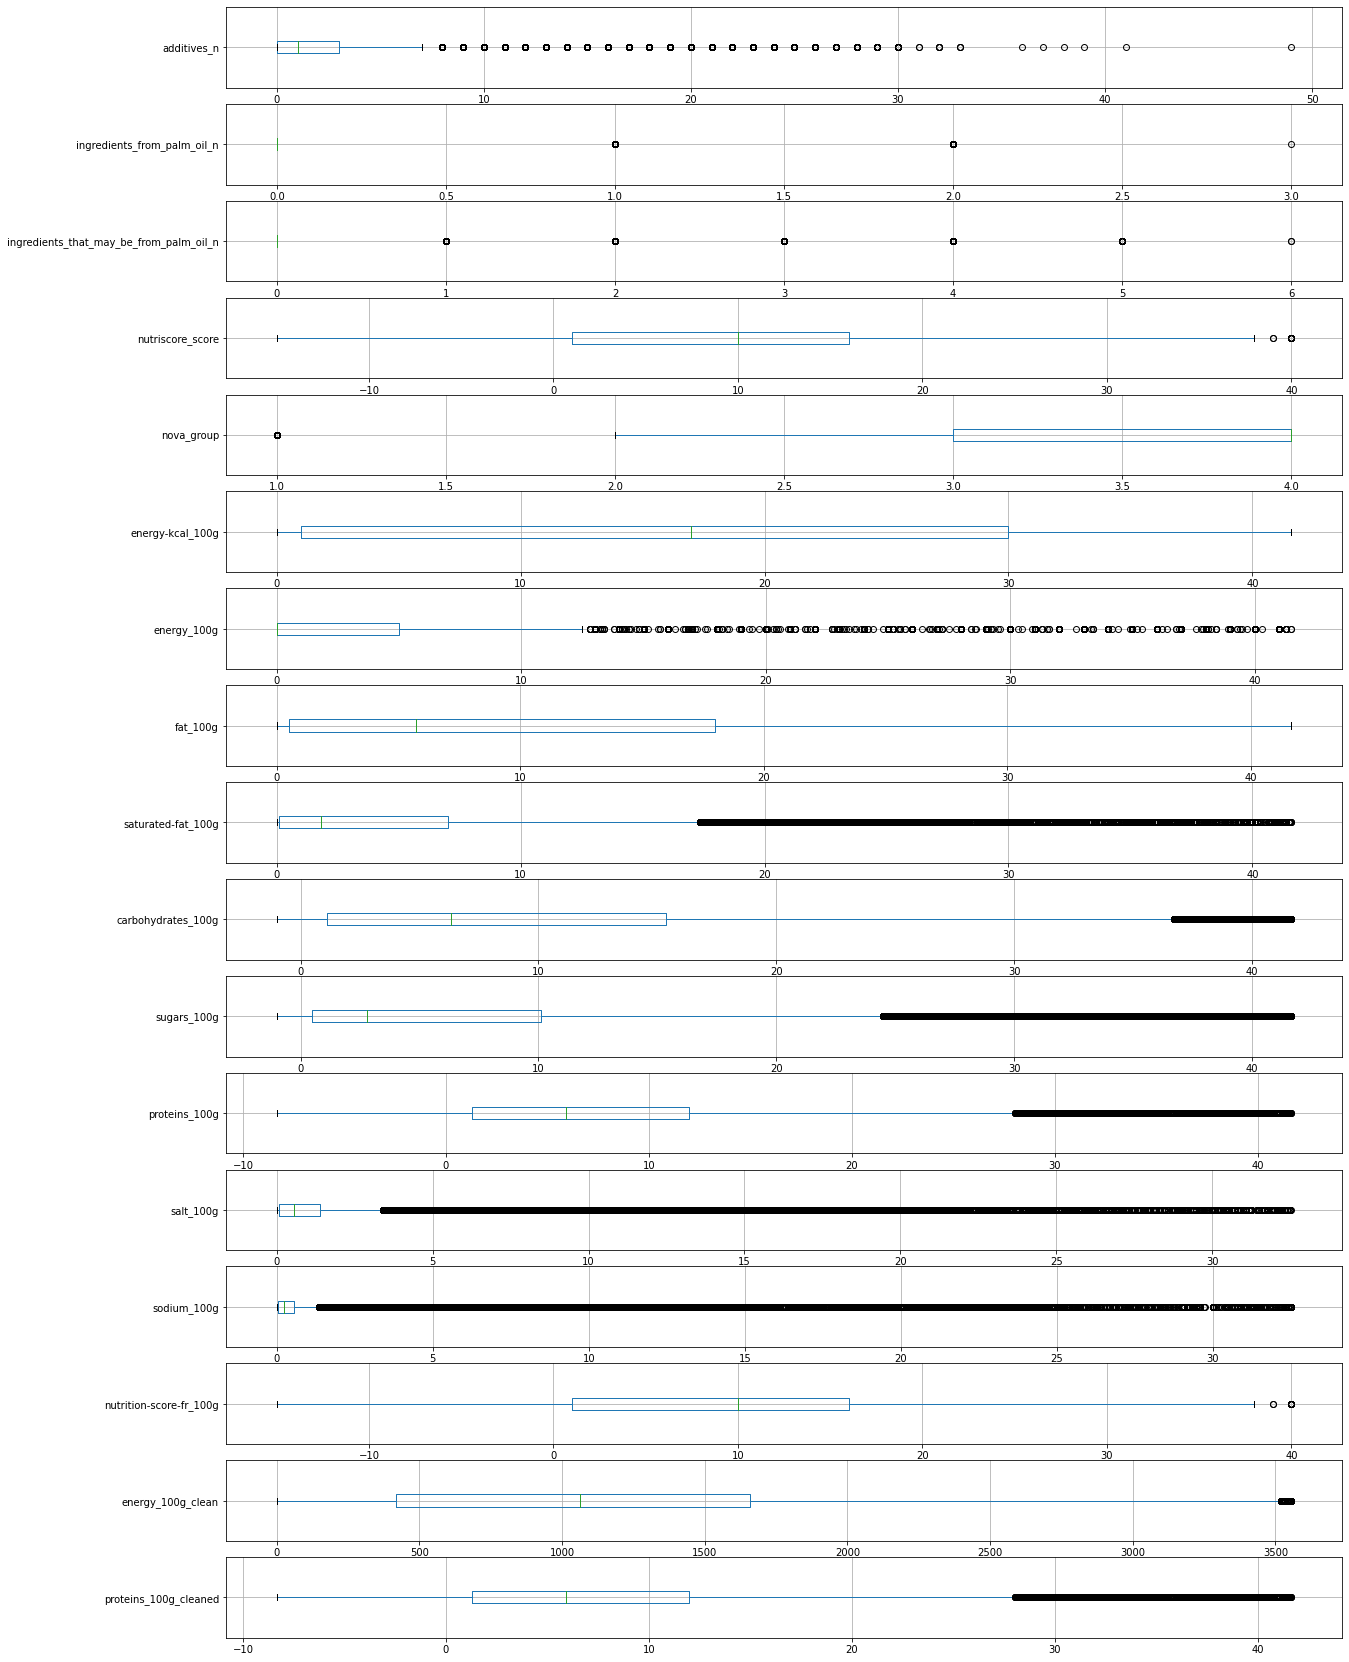

In [320]:
size = df.select_dtypes('float').columns.size
plt.figure(figsize=(20,30))
for i, col in enumerate(df.select_dtypes('float')):
    plt.subplot(size, 1, i+1)
    df.boxplot(column=col, vert=False)
plt.show

We see that:

| Feature | Comment |
|:-----|:-----|
| additives_n | lots of outliers above 8 |
| ingredients_from_palm_oil_n | just fex values (1, 2, 3) |
| ingredients_that_may_be_from_palm_oil_n | just few values (1, 2, 3, 4, 5, 6) |
| nutriscore_score | distribution to investigate |
| nova_group | distribution to investigate |
| energy-kcal_100g | two outliers above 0.1 |
| energy_100g | one outlier above 6 |
| fat_100g | one outlier above 1 |
| saturated-fat_100g | lots of outliers, need to refine |
| carbohydrates_100g | outliers above ~50000 |
| sugars_100g | one outlier above 0.1 |
| proteins_100g | lots of outliers above 5000 |
| salt_100g | lots of outliers above 2000 |
| sodium_100g | lots of outliers above ~2500 |
| nutrition-score-fr_100g | distribution to investigate |


(apply_func pid=122204) 
distribution of quantitative values


<function matplotlib.pyplot.show(close=None, block=None)>

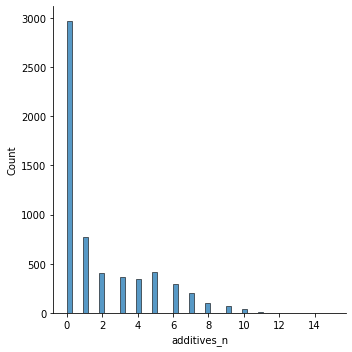

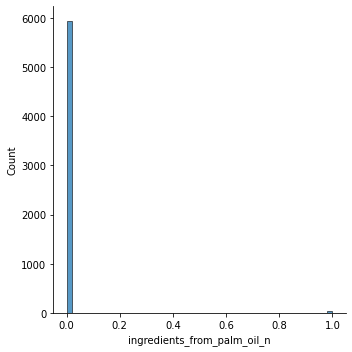

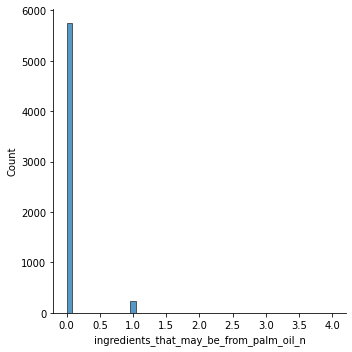

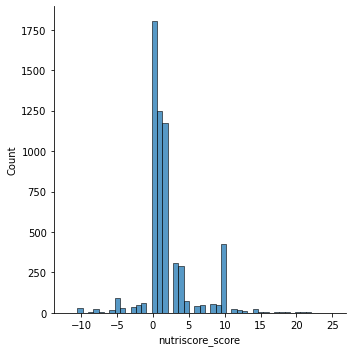

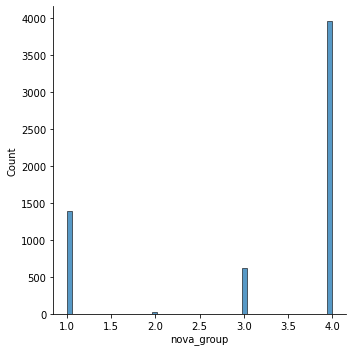

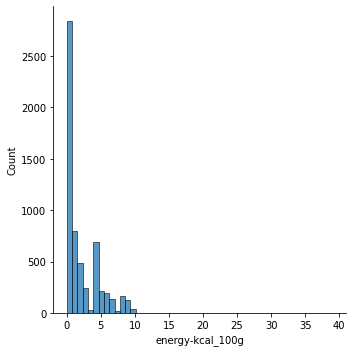

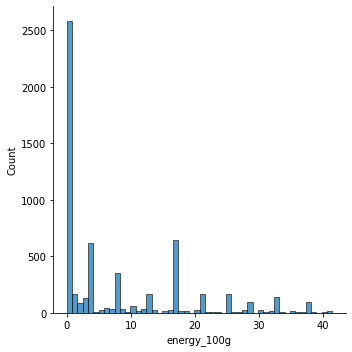

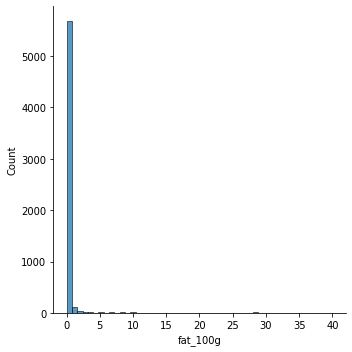

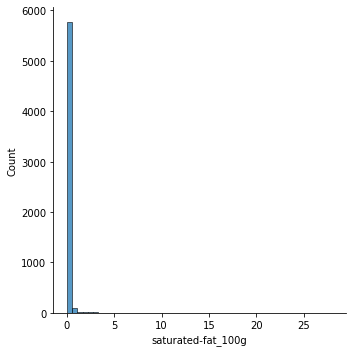

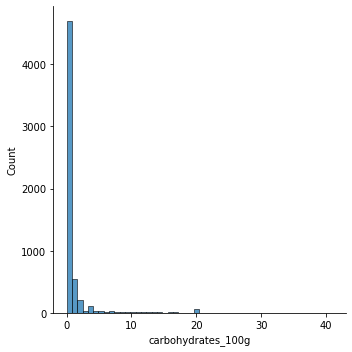

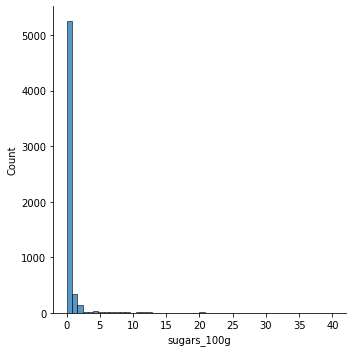

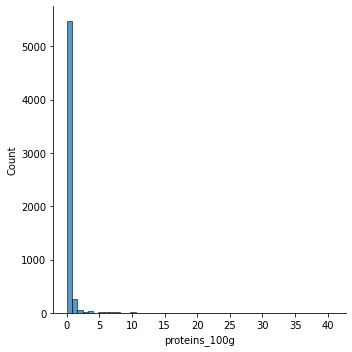

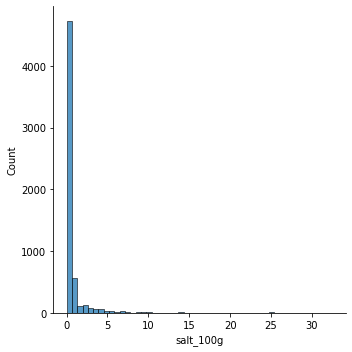

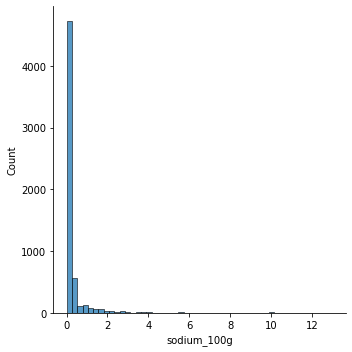

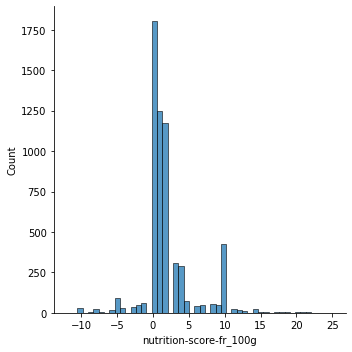

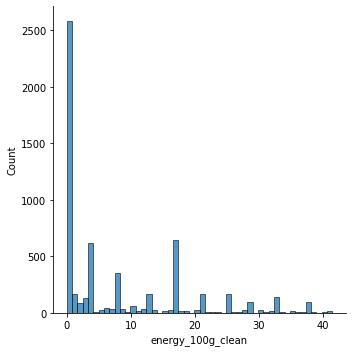

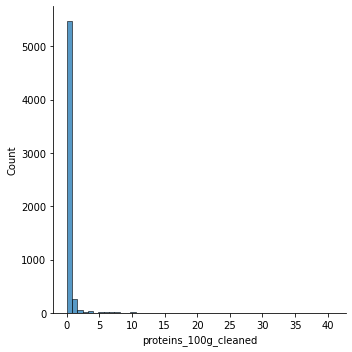

In [319]:
tmp_df = df.dropna()
size = tmp_df.select_dtypes('float').columns.size
print('distribution of quantitative values')
for i, col in enumerate(df.select_dtypes('float')):
    sns.displot(tmp_df, x=col, bins=50)
plt.show

In [32]:
# df.loc[:, 'energy-kcal_100g'].isnull()
for i, col in enumerate(df.select_dtypes('float')):
    print(f"{(df.loc[:,col].fillna(float(0)) == 0).mean()}")

additives_n   0.79
dtype: float64
ingredients_from_palm_oil_n   0.99
dtype: float64
ingredients_that_may_be_from_palm_oil_n   0.98
dtype: float64
nutriscore_score   0.66
dtype: float64
nova_group   0.68
dtype: float64
energy-kcal_100g   0.25
dtype: float64
energy_100g   0.23
dtype: float64
fat_100g   0.33
dtype: float64
saturated-fat_100g   0.40
dtype: float64
carbohydrates_100g   0.27
dtype: float64
sugars_100g   0.34
dtype: float64
proteins_100g   0.31
dtype: float64
salt_100g   0.37
dtype: float64
sodium_100g   0.37
dtype: float64
nutrition-score-fr_100g   0.66
dtype: float64


Correlation btw 'nutriscore_score' and 'additives_n'

'contingency table'


In [33]:
pd.crosstab(df['nutriscore_score'], df['additives_n'], dropna=True )

col_0,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,...,27.00,28.00,29.00,30.00,31.00,32.00,33.00,36.00,38.00,39.00
row_0,,,,,,,,,,,,,,,,,,,,,
-15.00,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-14.00,65,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-13.00,149,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-12.00,253,7,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-11.00,330,15,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-10.00,756,67,24,8,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
-9.00,1082,70,30,12,5,1,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
-8.00,2180,195,34,14,10,9,3,3,2,1,...,0,0,0,0,0,0,0,0,0,0
-7.00,3090,280,79,39,19,7,7,6,8,2,...,0,0,0,0,0,0,0,0,0,0


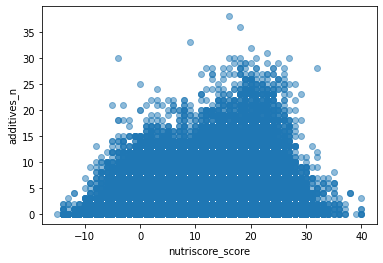

In [34]:
tmp_df = df.dropna()
plt.scatter(tmp_df['nutriscore_score'], tmp_df['additives_n'], alpha=0.5)
plt.xlabel('nutriscore_score')
plt.ylabel('additives_n')
plt.show()

(apply_list_of_funcs pid=122229) 


<function matplotlib.pyplot.show(close=None, block=None)>

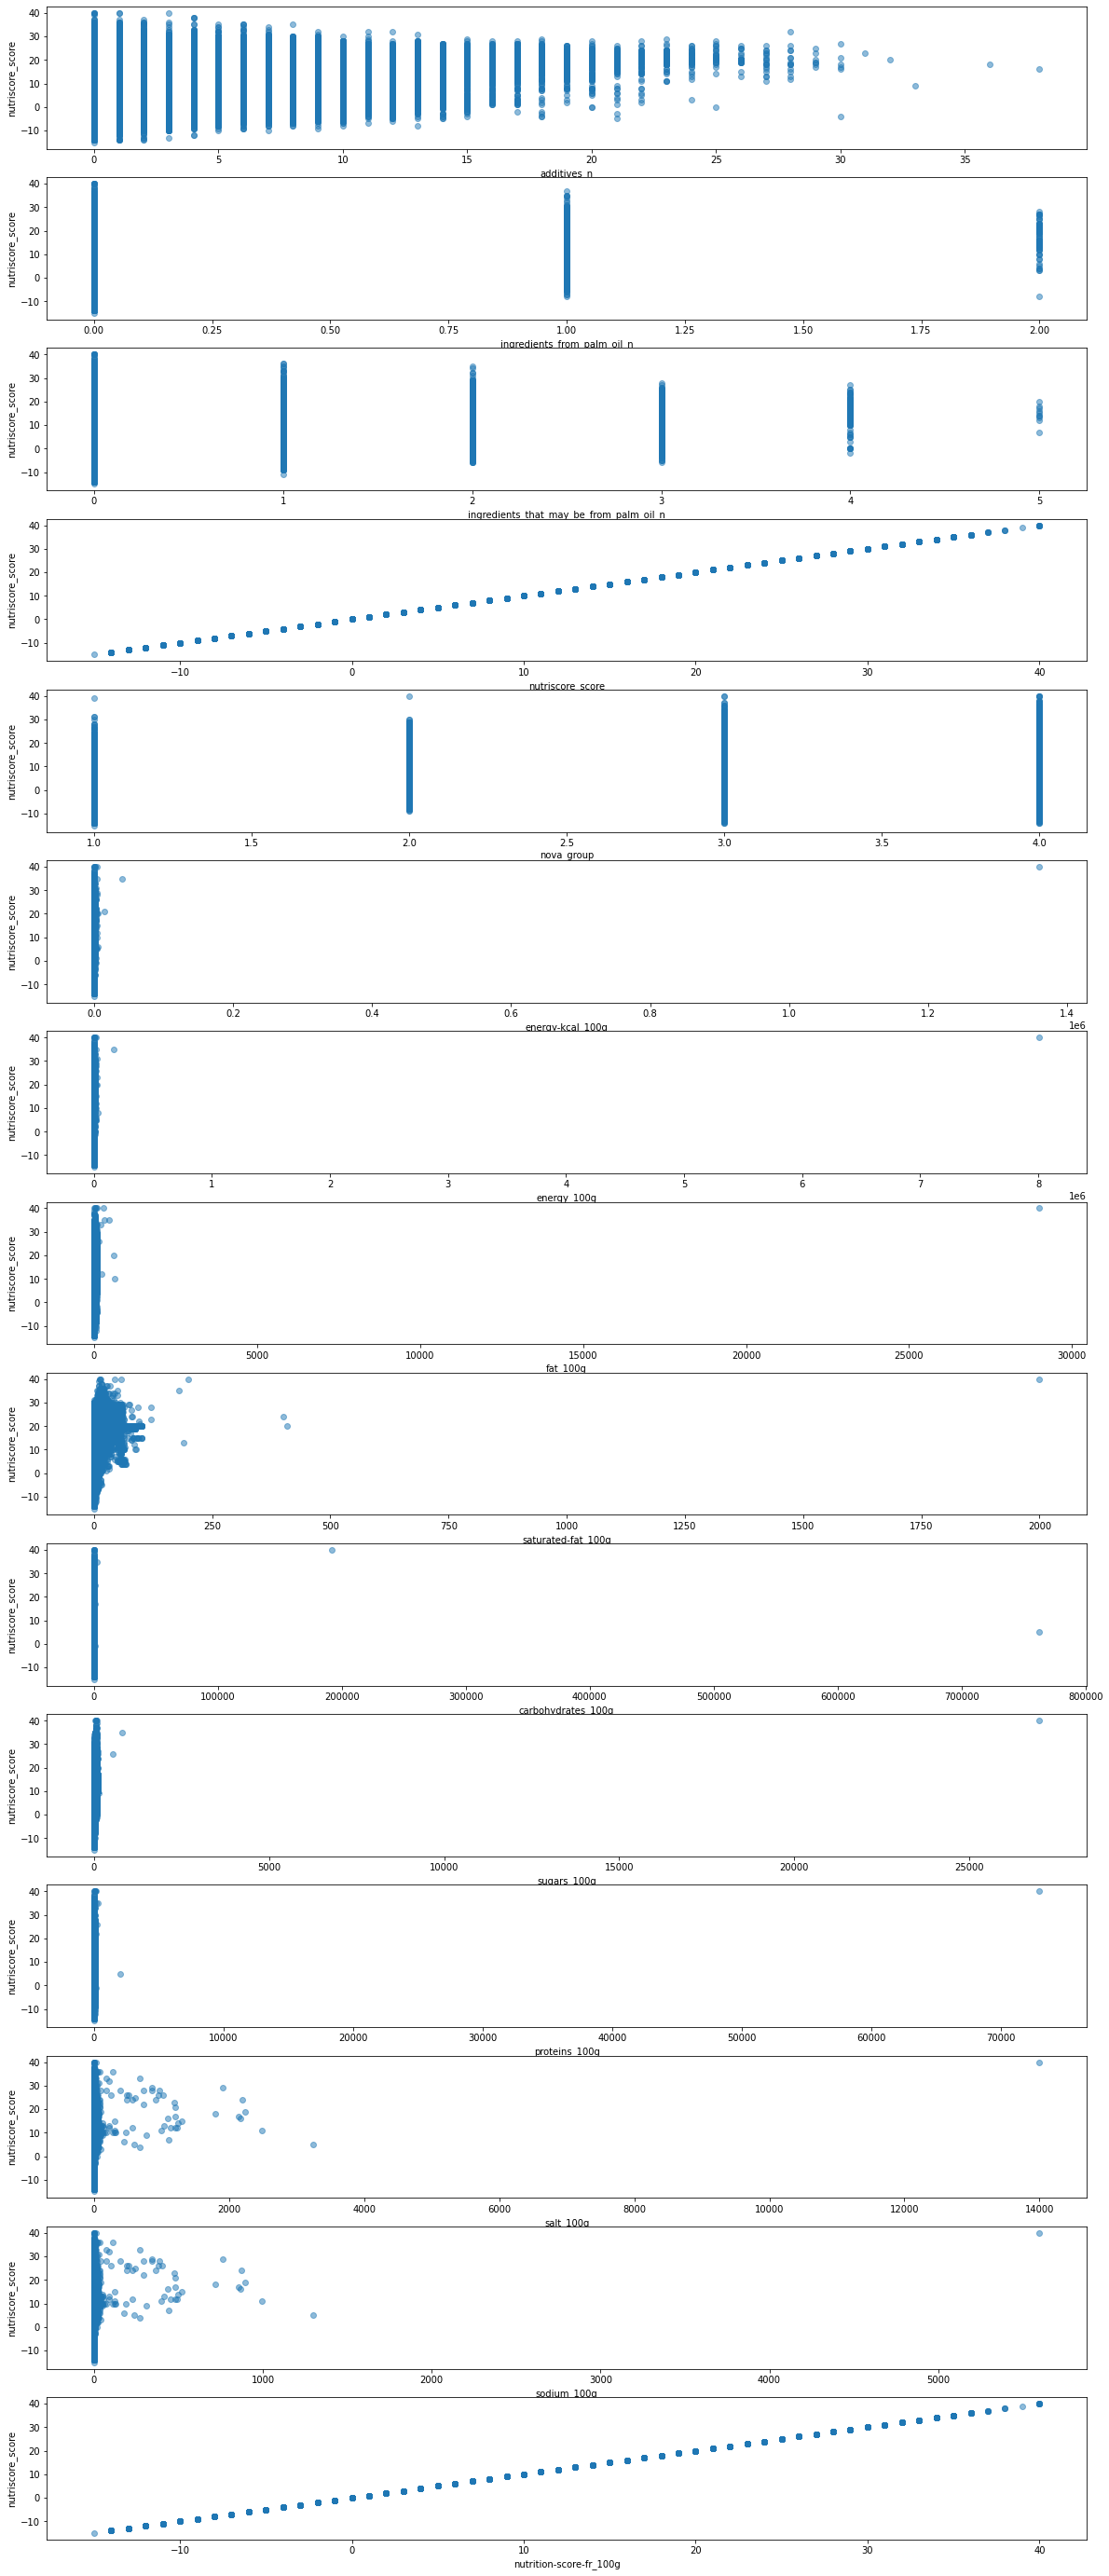

In [35]:
tmp_df = df.dropna()
plt.figure(figsize=(20,50))
size = tmp_df.select_dtypes('float').columns.size
for i, col in enumerate(df.select_dtypes('float')):
    plt.subplot(size, 1, i+1)
    plt.scatter(tmp_df[col], tmp_df['nutriscore_score'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('nutriscore_score')
plt.show

This feature has a multi modal distribution

## Qualitative Values

With a pre-filtered dataset. 

Let's look at the qualitative values, which ones are of interest


### dispertion of values

Let's show object features with their unique values : we are looking for features that contains just a few values, otherwise this is not interesting

In [36]:
df.columns[df.dtypes == 'object']

Index(['code', 'creator', 'product_name', 'brands', 'brands_tags',
       'categories', 'categories_tags', 'categories_en', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text',
       'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2', 'states',
       'states_tags', 'states_en', 'main_category', 'main_category_en'],
      dtype='object')

In [37]:
df['categories'].mode()

0    Snacks
Name: categories, dtype: object

In [38]:
df['countries_tags'].mode()

0    en:france
Name: countries_tags, dtype: object

We remove the columns with a higher percentage of not unique values, because they will result in a too big variance

So, we should only keep:

countries_en, additives_tags, nutriscore_grade, pnns_groups_1,pnns_groups_2,ecoscore_grade_fr,

## Quantitative Values

### Empirical Variance (Variance Empirique)

$ \upsilon = \frac{1}{n} \sum_{i=1}^n(x_i - \bar{x})²$

### Standard Deviation (Ecart-Type Empirique)

$ s = \sqrt{\upsilon} $ 


In [39]:
for col in df.select_dtypes('object'):
    print(f'{col} {(df[col].unique().size / df[col].size):.0%}')

code 100%
creator 1%
product_name 62%
brands 9%
brands_tags 7%
categories 6%
categories_tags 4%
categories_en 4%
countries 1%
countries_tags 0%
countries_en 0%
ingredients_text 31%
nutriscore_grade 0%
pnns_groups_1 0%
pnns_groups_2 0%
states 0%
states_tags 0%
states_en 0%
main_category 2%
main_category_en 2%


In [40]:
pd.crosstab(df['categories'], df['nutriscore_grade'])
# sns.catplot(x='categories', y='nutriscore_grade', data=df)

col_0,a,b,c,d,e
row_0,,,,,
% de matières grasses,0,2,0,1,0
0,0,3,1,0,0
05 PP,1,0,0,0,0
1,2,1,2,0,0
1% Low Fat Milk with Added Milk Protein,1,0,0,0,0
10,0,1,1,0,0
100,0,0,0,0,1
100 per 175g,1,0,0,0,0
100% kokosnootwater,1,0,0,0,0


In [41]:
def extractCountry(s):
    s = str(s).upper()
    if (s.find(':') != -1):
        return s[str(s).find(':')+1:]
    else:
        return s
        
def transformCountryCode(s):
    try:
        return pycountry.countries.get(name=s).alpha_2
    except BaseException as err:
#         print(f"corresponding country code for {s} not found")
        return s[:2]

def cleanCategory(s):
    s1 = extractCountry(s)
    s2 = transformCountryCode(s1)
    return s2

# test
# print(cleanCategory('en:France'))
# print(cleanCategory('en'))
# print(cleanCategory('en:United States'))
# print(cleanCategory("france"))
# print(cleanCategory("United States"))
# print(cleanCategory("magyarország"))


In [42]:
# add new column to dataset with standardized country code
df['countries_cleaned'] = df['countries'].fillna("XX").apply(cleanCategory)
print(f"our dataset contains {df['countries_cleaned'].unique().size} different countries")
# some countries are marked with ',', what is the impact ?
print(f"{df[['countries']][df['countries'].fillna('').str.contains(',')].count().values} rows have a country label possibly not standardized correctly")
df[['countries', 'countries_cleaned']][df['countries'].fillna('').str.contains(',')].sample(25)

our dataset contains 421 different countries
[103613] rows have a country label possibly not standardized correctly


,countries,countries_cleaned
149099,"United States, Germany",UN
1481743,"France,Switzerland",FR
1955219,"Frankreich,Deutschland",FR
1535567,"Ireland, Germany",IR
1267909,"United States, Germany",UN
1189569,"Frankreich,Deutschland",FR
1726834,"Francia,España",FR
1925174,"France, en:nl",NL
1963896,"Deutschland, Irland, en:at",AT
1438665,"Francja, Polska",FR


~100K lines contains countries code we are not able to process correclty, which represents about 5% of the dataset, which is insignificant.

Note : theses lines are not well explained, so we are not able to understand correctly what it means when several countries seperated by a comma appears in this columns

In [43]:
pd.crosstab(df['countries_cleaned'], df['nutriscore_grade'])

col_0,a,b,c,d,e
row_0,,,,,
::,0,1,0,0,0
AD,10,20,18,24,8
AE,16,19,13,16,17
AF,16,22,35,41,24
AH,0,0,1,1,1
AL,158,103,138,169,156
AM,0,0,0,1,1
AN,11,9,13,19,18
AO,0,3,1,1,1


In [44]:
df['countries_cleaned'] = df['countries_cleaned'].astype('category')
df['countries_cleaned'].cat.codes

0           33
1           30
2           33
3           33
4           30
5           30
6           33
7           33
8           33
9           33
10          33
11          33
12          33
13          33
14          33
15          33
16          33
17          33
18          33
19          33
20          33
21          30
22          33
23          33
24          33
25          33
26          33
27          33
28          33
29          33
30          33
1988445     33
1988446     33
1988447     33
1988448     33
1988449     33
1988450     33
1988451     33
1988452     33
1988453     33
1988454     33
1988455     33
1988456     33
1988457     33
1988458     33
1988459     33
1988460     33
1988461     33
1988462     30
1988463     33
1988464    135
1988465     33
1988466    112
1988467     23
1988468     33
1988469      9
1988470     34
1988471    106
1988472     33
1988473      9
1988474     33
1988475     33
Length: 1988476, dtype: int16

In [45]:
df['countries_cleaned'].cat.codes.unique().max()
# df[df['countries_cleaned'] == 'FR']

420

In [46]:
most_countries = df.value_counts(subset='countries_cleaned').head(3).index
df.loc[~df['countries_cleaned'].isin(most_countries)].shape

(572967, 38)

<AxesSubplot:title={'center':'distribution of countries in dataset (top 20)'}, xlabel='countries_cleaned'>

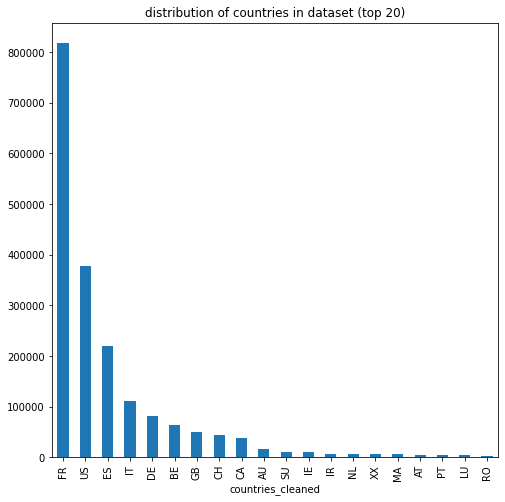

In [47]:
df.value_counts(subset='countries_cleaned').head(20).plot(kind='bar', figsize=(8,8), title='distribution of countries in dataset (top 20)')

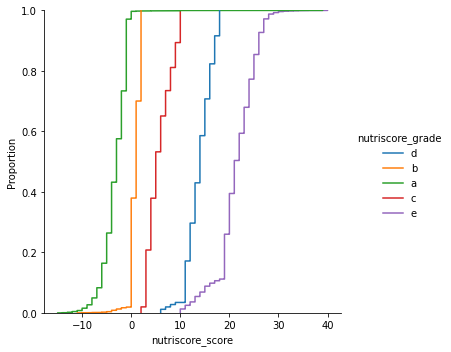

In [48]:
sns.displot(data=df, hue='nutriscore_grade', x='nutriscore_score', kind='ecdf')

In [49]:
df['nutriscore_grade_cat'] = df['nutriscore_grade'].astype('category')

In [50]:
df['nutriscore_grade_cat'].dropna().cat.categories

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [51]:
df['nutriscore_grade_cat'].dropna().cat.codes.unique()

array([3, 1, 0, 2, 4], dtype=int8)

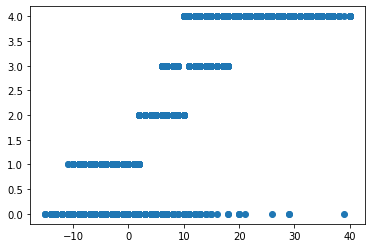

In [52]:
plt.scatter(df['nutriscore_score'], df['nutriscore_grade_cat'].cat.codes)

In [53]:
# show product names for country FR
df['product_name'].unique().size

1237742

In [54]:
df.loc[~df['countries_cleaned'].isin(most_countries)].shape

(572967, 39)

## Removal of outliners

https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

### Z-Score

![](./assets/Normal_Distribution_deviations.png)


applies only for unimodal & normal-distributions values, otherwise is not relevant

In [207]:
df['energy_100g'].agg(["skew", "kurtosis"])

skew          1256.01
kurtosis   1577561.00
Name: energy_100g, dtype: float64

Skew is positive and high, so Z-score method cannot be applied, therefore, IQR method is prefered


## IQR



Basic Quantile analysis:

In [71]:
df['energy_100g_qc'] = pd.qcut(df['energy_100g'], q=10)
df['energy_100g_qc'].head()

0                 NaN
1                 NaN
2    (1389.0, 1573.0]
3                 NaN
4      (527.0, 808.0]
Name: energy_100g_qc, dtype: interval

In [81]:
df['energy_100g_qc'].value_counts()

(1389.0, 1573.0]                   159603
(-0.001, 146.0]                    159565
(808.0, 1079.0]                    157879
(146.0, 310.0]                     157786
(1079.0, 1389.0]                   157481
(527.0, 808.0]                     157449
(1816.0, 2197.0]                   157219
(2197.0, 6.665558888888889e+42]    157159
(310.0, 527.0]                     156827
(1573.0, 1816.0]                   156593
Name: energy_100g_qc, dtype: int64

In [80]:
df['energy_100g_qc'].head()

0                 NaN
1                 NaN
2    (1389.0, 1573.0]
3                 NaN
4      (527.0, 808.0]
Name: energy_100g_qc, dtype: interval

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

IQR implementation

In [240]:
Q1 = df['energy_100g'].quantile(0.25)
Q3 = df['energy_100g'].quantile(0.75)
print(Q1)
print(Q3)

418.0
1674.0


In [241]:
IQR = Q3 - Q1
IQR

1256.0

In [242]:
df['energy_100g_clean'] = df['energy_100g'][df['energy_100g'].between((Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR))]

In [243]:
df['energy_100g_clean'].describe()

count   1559777.00
mean       1108.27
std         769.96
min           0.00
25%         418.00
50%        1063.00
75%        1657.00
max        3556.00
Name: energy_100g_clean, dtype: float64

In [244]:
    df['energy_100g_clean'].agg(["min", "max", "median", "mean", "var", "std", "skew", "kurtosis"]).T

min             0.00
max          3556.00
median       1063.00
mean         1108.27
var        592842.21
std           769.96
skew            0.40
kurtosis       -0.56
Name: energy_100g_clean, dtype: float64

We have very rare outstanding values, so they can be classified as outliers (outliers must be rare, otherwise question of interest in the dataset must be set). They won't have statiscial impact

what to do with outliers ?
* remove lines
* replace w/ Least Absolute Deviation Method
* replace w/ Robust Statistical Method
* replace by Least Squares Method


<AxesSubplot:>

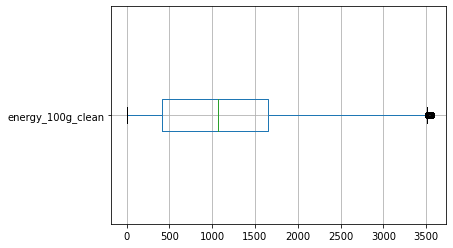

In [213]:
df.boxplot(column='energy_100g_clean', vert=False)

<AxesSubplot:ylabel='Frequency'>

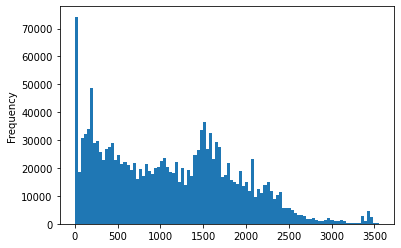

In [227]:
df.energy_100g_clean.dropna().plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Density'>

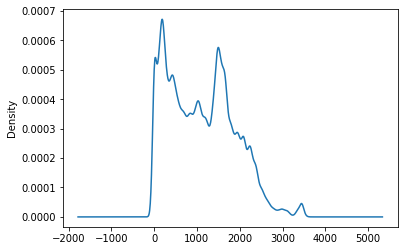

In [234]:
df['energy_100g_clean'].dropna().plot(kind='kde')

Implementation of outliers removal based on IQR method

## TODO : 
SI la variance / ecart type sont tres grands (rapport ) quoi ?) alors on applique la suppression des outliers

In [274]:
def dropOutliersIQR(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        df[col] = df[col][df[col].between((Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR))]

In [280]:
dropOutliersIQR(df, ['energy_100g', 'energy-kcal_100g', 'fat_100g',
'saturated-fat_100g',
'carbohydrates_100g',
'sugars_100g',
'proteins_100g',
'salt_100g',
'sodium_100g' ])

In [292]:
df.proteins_100g.agg(["min", "max", "median", "mean", "var", "std", "skew", "kurtosis"])

min        -500.00
max        1740.00
median        6.00
mean          8.68
var         120.83
std          10.99
skew         20.36
kurtosis   2195.70
Name: proteins_100g, dtype: float64

In [300]:
sigma3P = df.proteins_100g.mean() + df.proteins_100g.std()*3
sigma3P

41.66118692553238

In [301]:
sigma3N = df.proteins_100g.mean() - df.proteins_100g.std()*3
sigma3N

-24.292153109359106

In [308]:
df['proteins_100g_cleaned'] = df['proteins_100g'][df['proteins_100g'].between(sigma3N, sigma3P)]

In [309]:
df['proteins_100g_cleaned'].describe()

count   1555334.00
mean          8.11
std           8.16
min          -8.33
25%           1.30
50%           5.90
75%          12.00
max          41.66
Name: proteins_100g_cleaned, dtype: float64

<AxesSubplot:ylabel='Frequency'>

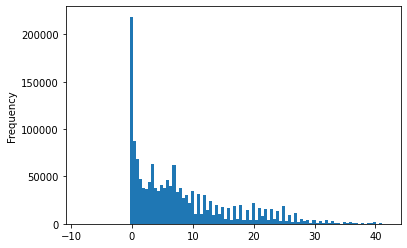

In [313]:
df.proteins_100g_cleaned.dropna().plot(kind='hist', bins=100)

In [314]:
df['proteins_100g'].describe()

count   1570849.00
mean          8.68
std          10.99
min        -500.00
25%           1.30
50%           6.00
75%          12.40
max        1740.00
Name: proteins_100g, dtype: float64

<AxesSubplot:ylabel='Frequency'>

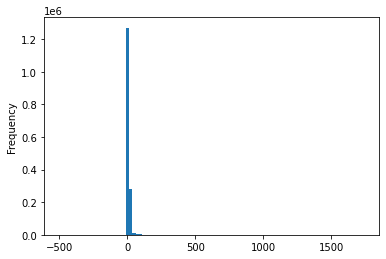

In [316]:
df.proteins_100g.dropna().plot(kind='hist', bins=100)

In [317]:
def dropOutliersZscore(df, cols):
    for col in cols:
        sigma3P = df.proteins_100g.mean() + df.proteins_100g.std()*3
        sigma3N = df.proteins_100g.mean() - df.proteins_100g.std()*3
        df[col] = df[col][df[col].between(sigma3N, sigma3P)]

In [318]:
dropOutliersZscore(df, ['energy_100g', 'energy-kcal_100g', 'fat_100g',
'saturated-fat_100g',
'carbohydrates_100g',
'sugars_100g',
'proteins_100g',
'salt_100g',
'sodium_100g' ])

(apply_list_of_funcs pid=122205) 


In [325]:
df.columns

Index(['code', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'countries', 'countries_tags',
       'countries_en', 'ingredients_text', 'additives_n',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'main_category',
       'main_category_en', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'countries_cleaned', 'nutriscore_grade_cat', 'energy_100g_clean',
       'energy_100g_qc', 'energy_100g_outliers', 'proteins_100g_cleaned'],
      dtype='object')

In [329]:
for col in df.columns:
    print(df[col].mode())

0          9542031695
1                 111
2         11110501790
3         11110580382
4         11110673558
5         11110737915
6         11110818775
7         11110863560
8         11152225623
9         11152851686
10        11152851747
11                112
12        11200000639
13        11210000018
14        11210008205
15        11210115224
16        11210125629
17        21131350499
18             211864
19                212
20             225380
21        22592053028
22        22592055053
23        24300833601
24        24600010931
25             246804
26             263573
27                273
28             307765
29             308595
30        30891052819
231      613008730758
232      613008739089
233           6136567
234      613668024006
235           6171872
236     7613034400680
237     8427260050460
238     8480000214010
239     8480000650740
240     8480000650757
241      870719000208
242     8711200350377
243     8716671000172
244      886054000001
245      8

## Resulting Dataset

We can see that some columns still have lots of empty values, but also that several rows have almost (or all) the features provided,
which is good for further analysis

In [60]:
# show heatmap : commented out since uses lots of resources, replaced by missingno
# plt.figure(figsize=(20,10))
# sns.heatmap(df.isna(), cbar=False)

# TODO

continuer à nettoyer le dataset

- [ ] analyser les outliers
- [ ] 
- [x] formater les categories en lowercase, splitter les tags (one hot ?). tip : `.apply(fct)` existe en python, ex: `data['taille'] = data['taille'].apply(convert_height)`

- [ ] approfondir la distribution des quali et quanti [cours](https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4742171-representez-la-distribution-empirique-dune-variable) 

### 4. discretiser les variables continues

> Le fait d'agréger une variable s'appelle la discrétisation (en anglais : binning, bucketing ou discretization).

empirical cumulative distribution function ([ecdf](https://machinelearningmastery.com/empirical-distribution-function-in-python/)) Dans le cas d'une variable qui ne suit pas une loi normale => est-ce le cas dans ce dataset ?

$ F_{emp}(x)=\frac{1}{n}\sum_{i=1}^{n}I_{\{{x_{i}} \leq x\}}$ 

où I est la fonction indicatrice. 1 si xi <= x, 0 sinon
    
code samples from course: 

```python
import matplotlib.pyplot as plt

# VARIABLE QUALITATIVE
# Diagramme en secteurs
data["categ"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["categ"].value_counts(normalize=True).plot(kind='bar')
plt.show()

# VARIABLE QUANTITATIVE
# Diagramme en bâtons
data["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()

# Histogramme
data["montant"].hist(density=True)
plt.show()
# Histogramme plus beau
data[data.montant.abs() < 100]["montant"].hist(density=True,bins=20)
plt.show()
```

### 5. faire le nombre et la fréquence des valeurs quali (pour toutes celles retenues dans le dataset)

```python
effectifs = data["quart_mois"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["quart_mois"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon
```

> modalité
>
> effectif
>
> fréquence
>
> variable qualitative ordinale

### 6. reverifier si la suppression des colonnes à du sens, si ce n'est pas preferable pour certaines de remplir avec une valeur arbitraire (moyenne, autre ...)

### 7. remplacer valeur NaN (`fillna`)

### 8. resample dataset ?
pour diminuer la taille et faciliter les calculs ?  `sklearn.utils.resample`

### 9. Analyse ANOVA

correlation entre variables

### 10. grouper les valeurs

par ex sur date `pd.cut` ou  `pd.qcut` pour les regrouper par mois



## Analysis

In [61]:
pd.crosstab(df['nutriscore_grade'], df['pnns_groups_1'] )

col_0,Alcoholic beverages,Beverages,Cereals and potatoes,Composite foods,Fat and sauces,Fish Meat Eggs,Fruits and vegetables,Milk and dairy products,Salty snacks,Sugary snacks,unknown
row_0,,,,,,,,,,,
a,1,4475,31525,6949,2696,12563,31084,9059,1750,1217,13583
b,1,8782,14230,13806,4166,12325,5239,14664,2427,2595,15443
c,10,9715,15036,16990,21141,17373,7258,16229,8727,12866,29427
d,21,7387,11859,12251,18650,29252,1048,39250,12277,49815,41992
e,11,15101,2216,1576,9714,16572,115,5027,5308,57922,18502


In [62]:
pd.crosstab(df['nutriscore_grade'], df['pnns_groups_2'] )

col_0,Alcoholic beverages,Appetizers,Artificially sweetened beverages,Biscuits and cakes,Bread,Breakfast cereals,Cereals,Cheese,Chocolate products,Dairy desserts,...,Salty and fatty products,Sandwiches,Soups,Sweetened beverages,Sweets,Teas and herbal teas and coffees,Unsweetened beverages,Vegetables,Waters and flavored waters,unknown
row_0,,,,,,,,,,,,,,,,,,,,,
a,1,205,71,553,4435,2288,18752,608,9,1141,...,205,308,397,70,642,2,0,21021,3299,13583
b,1,573,1525,939,5682,1270,5312,917,21,1031,...,615,714,1311,980,1583,214,1533,2096,718,15443
c,10,3076,1109,5338,6221,2818,4564,3993,142,3027,...,2756,1120,823,897,7103,202,1474,1883,119,29427
d,21,5582,1213,22182,3802,2287,5016,32393,2065,825,...,5502,1649,40,2251,23118,468,1261,292,50,41992
e,11,1399,1057,28014,295,165,1486,3732,11158,103,...,3676,131,12,8848,16256,252,3279,33,36,18502


ValueError: Could not interpret value `ecoscore_score_fr` for parameter `y`

<Figure size 1440x1440 with 0 Axes>

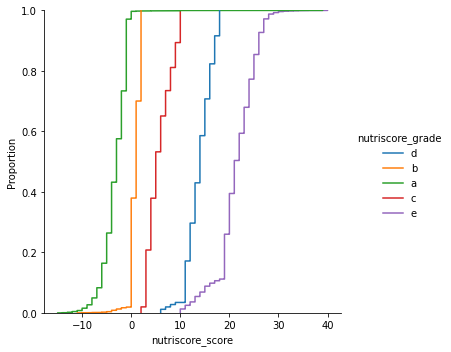

In [63]:
plt.figure(figsize=(20,20))
# sns.displot(df, x='nutriscore_grade')
sns.displot(df, x='nutriscore_score', hue='nutriscore_grade', kind='ecdf')
plt.savefig("nutriscore_grade_multivariate_analysis.png", format='png', dpi=150)
sns.displot(df, x='nutriscore_score', y='ecoscore_score_fr', hue='nutriscore_grade')
# sns.displot(df, x='nutriscore_score', y= 'nova_group', hue='nutriscore_grade', kind='kde')
# sns.displot(df, x='nutriscore_score', col='nutriscore_grade')
plt.savefig("nutriscore_ecoscore_multivariate_analysis.png", format='png', dpi=150)

In [ ]:
df['nutriscore_grade'].value_counts(normalize=True).plot.pie()

In [ ]:
df['nutriscore_score'].dropna().value_counts().sort_values(ascending=False)


We can see that some columns still have lots of empty values, but also that several rows have almost (or all) the features provided,
which is good for further analysis



In [ ]:
# most filled features
df.columns[[0, 1, 11, 12, 13, 25, 26, 27, 28, 29]]

In [ ]:
df.columns.get_loc('nutriscore_grade')